## Load packages

In [1]:
library(prophet)
library(dplyr)
library(plyr)
library(hydroGOF)
library(plotly)
library(forecast)

載入需要的套件：Rcpp

載入需要的套件：rlang


載入套件：'dplyr'


下列物件被遮斷自 'package:stats':

    filter, lag


下列物件被遮斷自 'package:base':

    intersect, setdiff, setequal, union


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


載入套件：'plyr'


下列物件被遮斷自 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


載入需要的套件：zoo


載入套件：'zoo'


下列物件被遮斷自 'package:base':

    as.Date, as.Date.numeric


載入需要的套件：ggplot2


載入套件：'plotly'


下列物件被遮斷自 'package:ggplot2':

    last_plot


下列物件被遮斷自 'package:plyr':

    arrange, mutate, rename, summarise


下列物件被遮斷自 'package:stats':

    filter


下列物件被遮斷自 'package:graphics':

    layout


Registered S3 method overwritten by 'quantmod':
  method    

## Data pre-processing

### Import Data

In [2]:
mydata=read.csv("time series data.csv")
mydata=as.data.frame(mydata)
head(mydata)
nrow(mydata)

,DATE,No
,<chr>,<int>
1,10/09/2007,325
2,10/10/2007,417
3,10/11/2007,556
4,10/12/2007,467
5,10/13/2007,430
6,10/14/2007,434


[1] 2996

### Re-scale the date format

In [3]:
colnames(mydata)=c("ds","y")
mydata$ds=seq(as.Date('2007-10-09'),by='days',length=nrow(mydata))

##  Model derivation

### Split data into training and testing sets

In [4]:
training=mydata[1:2641,]    # years 2007-2014 as the training set
testing=mydata[2642:2996,]  # year 2015 as the testing set

### Modeling

In [5]:
modelfit=prophet(df=training,
                 growth="linear",
                 changepoints=NULL,
                 n.changepoints=25,
                 yearly.seasonality=TRUE,
                 weekly.seasonality=TRUE,
                 daily.seasonality=TRUE,
                 holidays=NULL,
                 seasonality.prior.scale=10,
                 changepoint.prior.scale=2.8,
                 holidays.prior.scale=10,
                 mcmc.samples=100,
                 interval.width=0.8,
                 uncertainty.samples=1000,
                 fit=TRUE)

future=make_future_dataframe(modelfit,periods=355)
future$cap=450
tail(future)


SAMPLING FOR MODEL 'prophet' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.003 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 30 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: WARNING: There aren't enough warmup iterations to fit the
Chain 1:          three stages of adaptation as currently configured.
Chain 1:          Reducing each adaptation stage to 15%/75%/10% of
Chain 1:          the given number of warmup iterations:
Chain 1:            init_buffer = 7
Chain 1:            adapt_window = 38
Chain 1:            term_buffer = 5
Chain 1: 
Chain 1: Iteration:  1 / 100 [  1%]  (Warmup)
Chain 1: Iteration: 10 / 100 [ 10%]  (Warmup)
Chain 1: Iteration: 20 / 100 [ 20%]  (Warmup)
Chain 1: Iteration: 30 / 100 [ 30%]  (Warmup)
Chain 1: Iteration: 40 / 100 [ 40%]  (Warmup)
Chain 1: Iteration: 50 / 100 [ 50%]  (Warmup)
Chain 1: Iteration: 51 / 100 [ 51%]  (Sampling)
Chain 1: Iteration: 60 / 100 [ 60%]  

Warning message:
"There were 200 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
http://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded"
Warning message:
"Examine the pairs() plot to diagnose sampling problems
"
Warning message:
"The largest R-hat is 3.22, indicating chains have not mixed.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#r-hat"
Warning message:
"Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess"
Warning message:
"Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess"


,ds,cap
,<dttm>,<dbl>
2991,2015-12-16,450
2992,2015-12-17,450
2993,2015-12-18,450
2994,2015-12-19,450
2995,2015-12-20,450
2996,2015-12-21,450


### Make prediction

In [6]:
forecast=predict(modelfit,future)
pred_train=forecast[1:2641,c('ds','yhat','yhat_lower','yhat_upper')]
pred_train=as.data.frame(pred_train)
pred_test=forecast[2642:2996,c('ds','yhat','yhat_lower','yhat_upper')]
pred_test=as.data.frame(pred_test)
preddata_train=cbind(training[,"y"],pred_train[,'yhat'])
preddata_test=cbind(testing[,"y"],pred_test[,'yhat'])

### Calculate the error of prediction

#### error

In [7]:
error_train=c(preddata_train[,1])-c(preddata_train[,2])
error_test=c(preddata_test[,1])-c(preddata_test[,2])
error_train
error_test

[1] -1.181661e+02 -4.890240e+01  3.838927e+01 -1.016689e+00 -3.922240e+00
   [6]  7.220158e+00  1.258376e+01 -1.612354e+01  1.050062e+01  6.904326e+01
  [11] -2.422840e+01  5.188023e+01  2.091706e+01 -4.594052e+01 -6.197694e+01
  [16] -3.277887e+01 -5.745398e+00 -3.859301e+01 -3.410895e+01 -8.725836e+00
  [21]  7.753742e+00 -3.993462e+01 -3.635829e+01 -5.898400e+00  3.744583e+00
  [26] -3.203013e+00 -6.163187e+00 -1.193114e+01  5.823257e+01  2.576077e+01
  [31]  2.026885e+01  2.504925e+01  3.178902e-01 -1.136072e+01 -2.779788e+01
  [36] -2.827238e+01  2.662887e+01  7.650059e+01 -1.138568e+01 -1.583452e+01
  [41] -4.300772e+00 -7.613402e+00 -2.306651e+01 -1.425954e+01  2.239299e+01
  [46] -1.584301e+01 -1.477397e+01  2.014730e+01  7.097786e+00  1.979306e+01
  [51]  8.646808e+00  3.626074e+01  1.049196e+02  4.983777e+01 -8.415255e+00
  [56]  2.336047e+01  5.903452e+00  1.464961e+01  7.522140e+01  5.492217e+01
  [61]  3.698226e+01 -5.016288e+00  4.113537e+01  4.118058e+01  3.155584e+01
  [66]  6.687987e+01  2.144801e+01  5.747852e+01  3.553769e+01  5.381528e+01
  [71]  5.032916e+00 -2.339669e+01  2.712015e+01 -1.814672e+01  3.399583e+01
  [76] -1.390984e+01  4.230423e+01  2.634066e+01  5.967959e-01  2.865515e+01
  [81]  1.877919e+01  1.616081e+01  1.734660e+01  2.551428e+01  1.038173e+01
  [86]  4.406356e+01  4.347107e+01 -6.110238e+01 -4.643124e+01 -4.293227e+01
  [91] -6.938905e+01 -5.304385e+01 -3.343883e+01  5.307301e+01 -8.178020e+00
  [96] -4.693243e+01 -8.357712e+01 -1.008707e+02 -9.203607e+01 -6.760257e+01
 [101] -5.991713e+01 -8.165061e+01 -7.755207e+01 -9.902430e+01 -1.148490e+02
 [106] -7.327896e+01 -1.008796e+02 -9.703947e+01 -1.184757e+02 -6.098742e+01
 [111] -3.302994e+01  7.556099e+01  2.034781e+02  1.881028e+02  4.799495e+01
 [116]  1.538947e+01 -7.355649e+01 -7.433685e+01 -9.381977e+01 -1.933813e+01
 [121] -2.452908e+01  2.215669e+01  3.951005e+00 -3.698421e+01  1.786943e+01
 [126] -1.033681e+01  1.209022e+01 -9.454752e+00  1.561454e+01  2.570898e+00
 [131]  6.203515e-01 -3.567266e+01 -2.810995e+01  1.104834e+01 -1.075766e+01
 [136]  4.010139e+01  5.593813e+01  2.199436e+01  5.286553e+01  5.077552e+01
 [141]  4.248416e+01  3.744559e+01  8.229715e+01  6.835350e+01  2.485278e+01
 [146]  3.238143e+01  1.214951e+01  3.789885e+01  1.706214e+01  3.725253e+01
 [151]  4.175871e+01 -3.520822e+01  1.691103e+01  6.530002e+01 -2.232451e+01
 [156]  4.471508e-01  1.020789e+01  3.222933e+01  3.370907e+01  4.819669e+01
 [161] -2.313003e+01  1.744378e+01  2.329694e+00  4.512596e+01 -6.288735e+01
 [166] -5.050152e+01 -3.115378e+01 -3.065164e+01 -3.126470e+01 -1.456563e+01
 [171]  8.010980e+01 -2.199474e+01 -1.657913e+00  2.693551e+00  8.260086e+00
 [176]  3.077717e+01  1.067410e+01  1.356324e+01  2.173449e+01  3.340169e+01
 [181]  2.112781e+01 -2.989954e+01  6.040206e+00 -3.164010e+01  3.165440e+01
 [186] -2.080427e+01 -1.181994e+01 -2.084647e+01 -9.711630e+00 -3.170818e+01
 [191] -1.443410e+01 -1.230236e+01  6.954544e+00 -3.346816e+01 -2.402159e+01
 [196] -4.526996e+00  8.732960e+00  2.173859e+00  3.739938e+01 -7.130362e+01
 [201] -7.071840e+01 -5.227296e+01 -1.276450e+01 -1.045133e+01 -5.893961e+00
 [206]  5.340896e-01 -1.885932e+01  2.416115e+01 -6.881686e+01  3.421597e+00
 [211]  5.626536e+00 -3.475835e+01  1.989332e+01 -3.115008e+00 -4.155664e+01
 [216] -3.685666e+01 -2.581651e+01  1.229413e+01 -2.710351e+01 -4.440764e+01
 [221] -1.534089e+01 -1.570340e+01  4.105290e+01 -1.289957e+01 -2.285517e+01
 [226] -3.041521e+01 -1.999768e+01  1.065829e+01 -4.926018e+01 -5.121363e+01
 [231]  2.196605e+01  1.098462e+01 -3.675467e+01  4.133899e+01 -4.460730e+00
 [236]  7.404972e+01  3.242935e+01  4.986836e+01  3.009658e+01 -7.457515e+00
 [241]  3.782264e+01  5.236238e+00 -1.498862e+01  1.672996e+01 -1.839719e+01
 [246]  3.037746e+01  5.149679e+01  1.065880e+02  1.995697e+01  6.834289e+00
 [251] -1.219983e+01  1.405968e+01  2.635072e+01  6.810300e+01  7.020753e+01
 [256]  3.567116e+01 -2.929640e+01  1.986278e+01  4.333081e+01  2.382262e+01

[1]  -20.9934672  -34.1293893  -21.0422486   31.8406463  -27.2746692
  [6]   10.3595562  -75.8081304  -29.1390804  -34.3101190  -35.0674922
 [11] -101.8022102  -72.2752359  -13.7100724  -43.6345508 -121.3922826
 [16]  -55.6488550  -24.1462467  -33.2784714  -31.8168892  -34.0027325
 [21]  -48.3886508  -84.3497389  -60.5891391  -18.8917071  -64.6987676
 [26] -117.8324214  -64.5869756  -43.5693280 -101.2088002  -65.2615403
 [31]  -45.5630144   -8.6016434  -52.2420740  -61.8156834  -11.9601700
 [36]   13.8712546   34.9059371   35.2995848   46.5627388  284.8374260
 [41]  348.8063937  345.8530842  169.5518444   86.1632548   17.8810643
 [46]   11.2576947   25.4798487   49.2766546   38.0785306   22.5062976
 [51]    6.8654468   74.3920809   27.6775146   -4.0569095  -26.0523386
 [56]  -13.8540605    5.1772472   16.3595859   -7.0644589  -46.5029932
 [61]   -6.7397225   41.9739486  -18.9221914   20.1922406   29.6130282
 [66]   17.5580603    0.5928937   -2.0933033   69.2209901  -29.0506569
 [71]   43.6875211   32.7089590  -23.7879635   -7.2538987  -18.5122494
 [76]  -36.8502184  -71.8590339  -41.9438551   26.1715231   34.6916504
 [81]   50.1750447  -18.1900155   89.3228985   64.1375279    7.8643768
 [86]   82.7953550   22.1501177   -4.4989185  -29.9513369   21.5291858
 [91]  -24.6263565  -42.8031466  -12.7080930   -6.1235674  -14.4823518
 [96]   -9.5922487  -15.7279151  -15.4717397   16.7757549    7.2908828
[101]   18.2736309   27.2733235   20.4646402   -1.4435938   50.9513156
[106]   45.2360867   21.6769270   46.4667866   30.1513462   29.9052565
[111]   62.4410373  -27.8312056    5.6862513   26.2739763    6.1422905
[116]   -3.1431879   30.6141662   -8.8497155    5.8994703   24.4837446
[121]   42.2073759    7.3030975   32.3569918    2.5835880   24.7336180
[126]   26.2526208   26.7699294   74.5929481   45.9532383   -8.5686072
[131]  -13.7677519   23.0928758    2.4415386  -51.1128677    8.7140135
[136]   12.1287106   21.6854834   57.5622604   49.4693729   52.8092518
[141]   45.1665853    2.8038171  131.9084642   13.0192002   45.3022188
[146]   21.4602857   50.8926325   15.1851886   33.6060259   21.3524982
[151]   41.9770278   68.6630603   37.1336094    9.8105608   38.3042463
[156]   41.9081856   29.8454946   35.6939370   27.6611599   88.4925573
[161]   53.6299489   64.7006056   64.0115317   39.7955196   53.6359594
[166]  -26.2580453   16.8561877   17.4137237  -12.9687212  -57.9981449
[171]  -73.4587528  -19.7866118  -57.7939295  -85.7605348  -76.2743893
[176] -110.7416265  -93.8912355  -72.5279069  -70.1060900  -59.4537466
[181]   -0.8633912  -42.9322613  -20.0721240   13.9861574   -8.5602244
[186]  -28.1601972  -31.6327980  -33.2585522  -43.6200806  -73.1124233
[191]  -44.4481897  -55.4110361  -18.4305006   -9.3066556  -20.3021380
[196]  -37.9833713  -49.7314521  -58.2477892  -32.3079837  -20.3369663
[201]  -34.1338400  -25.9639851  -57.4002343  -32.8335940  -27.9786014
[206]   48.3731833  -14.2214742   -1.5817585   10.0057234   -8.0535541
[211]   48.8279497   27.9151930    4.3977541   -0.1841662  -34.6634241
[216]   35.6631142   23.1945010  -22.4839903  -31.1053152  -33.4733825
[221]   -9.0371082   -0.6142809  -10.4828261   -2.2213064   -2.2191551
[226]  -24.1817529    7.1161439   18.2555920  -28.5511972  -29.5529259
[231]  -47.3005040  -50.1580418  -49.8086317  -23.0084042  -49.1618739
[236]  -33.0470221  -50.9076672  -20.2949293   20.4217437  -59.4511005
[241]    7.3152663  -31.7032221  -27.3080178  -13.7697325  -50.6689146
[246]  -25.4063176  -11.7077684   -9.3771475  -13.8705244   -4.0199294
[251]  -32.1243487    9.2102122  -13.4389079  -60.8153647   -4.7363730
[256]   19.3334479   16.5584572   27.6410165  -17.0186919   31.1674472
[261]   44.4707677  194.0927694   89.5906842   90.1531927   36.5087179
[266]   46.0844751   32.4957981    3.0406438   26.9457865   25.7916811
[271]   41.7875447   54.6791036    3.9071981  -14.9032220  -39.4488013
[276]  -24.5016645    1.5154950    5.8046702   33.1005824   26.8296879
[281]  -36.4003262   38.69

#### MAPE

In [8]:
MAPE_train=mean(abs(c(error_train)/c(preddata_train[,1])))
MAPE_test=mean(abs(c(error_test)/c(preddata_test[,1])))

#### MAE

In [9]:
MAE_train=mean(abs(c(error_train)))
MAE_test=mean(abs(c(error_test)))

#### RMSE

In [10]:
RMSE_train=rmse(preddata_train[,1],preddata_train[,2])
RMSE_test=rmse(preddata_test[,1],preddata_test[,2])

#### Print the results

In [11]:
results=list("MAPE of training"=MAPE_train,
             "MAPE of testing"=MAPE_test,
             "MAE of training"=MAE_train,
             "MAE of testing"=MAE_test,
             "RMSE of training"=RMSE_train,
             "RMSE of testing"=RMSE_test)
print(results)

$`MAPE of training`
[1] 0.06224838

$`MAPE of testing`
[1] 0.07810455

$`MAE of training`
[1] 28.68615

$`MAE of testing`
[1] 37.16313

$`RMSE of training`
[1] 41.18928

$`RMSE of testing`
[1] 53.00398



## Time series plot

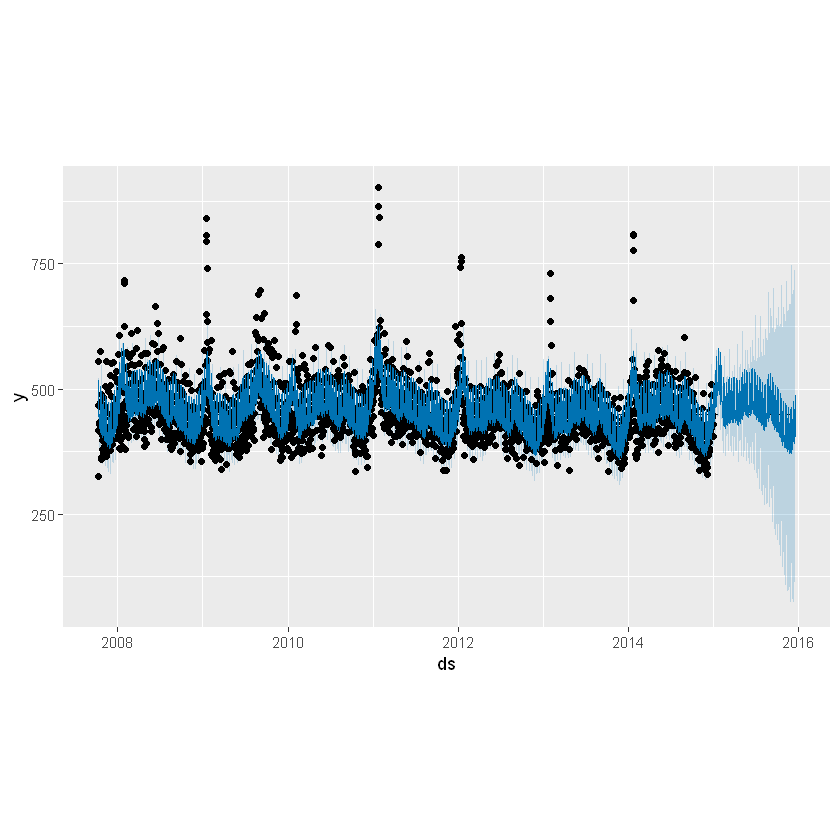

In [12]:
plot(modelfit,forecast)